In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

#2. Load the dataset

In [3]:
obj=pd.read_csv("/content/Churn_Modelling.csv")

#3. Perform Below Visualizations

#a) Univariate Analysis

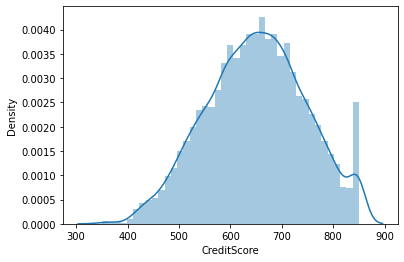

In [6]:
sns.distplot(obj['CreditScore'])

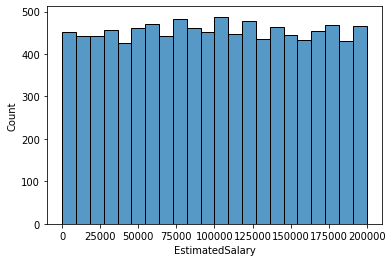

In [7]:
sns.histplot(obj['EstimatedSalary'])

#b) Bi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


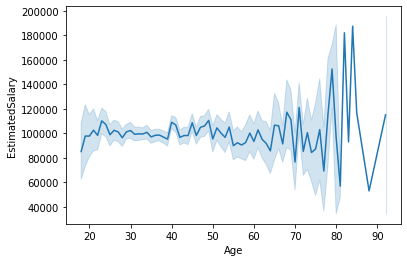

In [8]:
sns.lineplot(obj['Age'],obj['EstimatedSalary'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


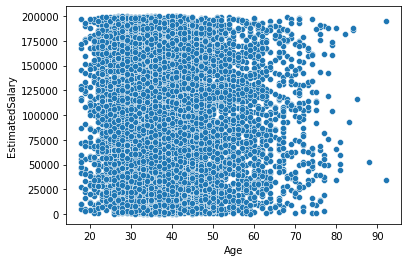

In [9]:
sns.scatterplot(obj['Age'],obj['EstimatedSalary'])

#c)Multi - Variate Analysis

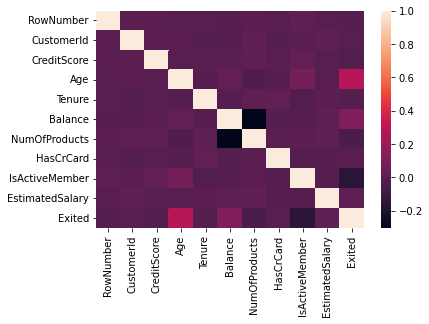

In [10]:
sns.heatmap(obj.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


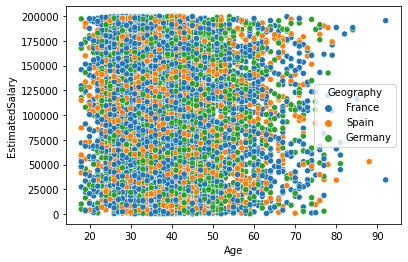

In [11]:
sns.scatterplot(obj['Age'],obj['EstimatedSalary'],obj['Geography'])

#4. Perform descriptive statistics on the dataset

In [12]:
obj.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [13]:
obj.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#5. Handle the Missing values

In [14]:
obj.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

#6. Find the outliers and replace the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


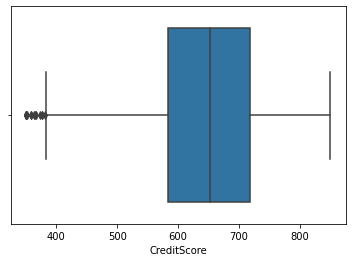

In [15]:
sns.boxplot(obj['CreditScore'])

In [16]:
q=obj.quantile([0.85,0.35])
q

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.85,8500.15,15777904.45,754.0,49.0,8.0,140895.0965,2.0,1.0,1.0,170322.3935,1.0
0.35,3500.65,15654138.50,613.0,34.0,3.0,0.0000,1.0,1.0,0.0,70659.7280,0.0


In [17]:
iqr=q.iloc[0]-q.iloc[1]
iqr

RowNumber            4999.5000
CustomerId         123765.9500
CreditScore           141.0000
Age                    15.0000
Tenure                  5.0000
Balance            140895.0965
NumOfProducts           1.0000
HasCrCard               0.0000
IsActiveMember          1.0000
EstimatedSalary     99662.6655
Exited                  1.0000
dtype: float64

In [18]:
u=q.iloc[0]+(1.5*iqr)
u

RowNumber          1.599940e+04
CustomerId         1.596355e+07
CreditScore        9.655000e+02
Age                7.150000e+01
Tenure             1.550000e+01
Balance            3.522377e+05
NumOfProducts      3.500000e+00
HasCrCard          1.000000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    3.198164e+05
Exited             2.500000e+00
dtype: float64

In [19]:
l=q.iloc[1]-(1.5*iqr)
l

RowNumber         -3.998600e+03
CustomerId         1.546849e+07
CreditScore        4.015000e+02
Age                1.150000e+01
Tenure            -4.500000e+00
Balance           -2.113426e+05
NumOfProducts     -5.000000e-01
HasCrCard          1.000000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -7.883427e+04
Exited            -1.500000e+00
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


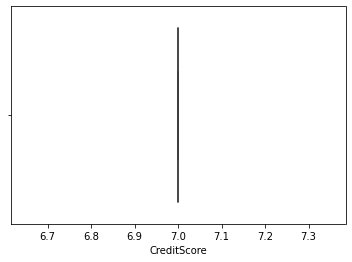

In [20]:
obj['CreditScore']=np.where(obj['CreditScore']>10,7,obj['CreditScore'])
sns.boxplot(obj['CreditScore'])

#7. Check for Categorical columns and perform encoding

In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()
obj['Geography']=le.fit_transform(obj['Geography'])
obj.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,7,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,7,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,7,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,7,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,7,2,Female,43,2,125510.82,1,1,1,79084.10,0


#8. Split the data into dependent and independent variables

In [22]:
x=obj.iloc[:,0:2]
x

,RowNumber,CustomerId
0,1,15634602
1,2,15647311
2,3,15619304
3,4,15701354
4,5,15737888
...,...,...
9995,9996,15606229
9996,9997,15569892
9997,9998,15584532
9998,9999,15682355


In [23]:
y=obj['EstimatedSalary']
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

#9. Scale the independent variables

In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
s=StandardScaler()
x_scale=s.fit_transform(x)
x_scale

array([[-1.73187761, -0.78321342],
       [-1.7315312 , -0.60653412],
       [-1.73118479, -0.99588476],
       ...,
       [ 1.73118479, -1.47928179],
       [ 1.7315312 , -0.11935577],
       [ 1.73187761, -0.87055909]])

#10. Split the data into training and testing

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.3,random_state=0)
x_train

array([[ 0.92889885, -0.79703192],
       [ 1.39655257,  0.71431365],
       [-0.4532777 ,  0.96344969],
       ...,
       [-0.60119484, -1.62052514],
       [ 1.67853045, -0.37403866],
       [-0.78548505, -1.36411841]])

In [26]:
x_train.shape

(7000, 2)

In [27]:
x_test

array([[ 1.52229946, -1.04525042],
       [-1.42080128, -0.50381294],
       [-0.90118604, -0.7932923 ],
       ...,
       [ 1.49216178, -0.14646448],
       [ 1.1758893 , -1.29228727],
       [ 0.08088677, -1.38538833]])

In [28]:
x_test.shape

(3000, 2)

In [29]:
y_train

7681     55796.83
9031     19823.02
3691     13848.58
202     146145.93
5625    129562.74
          ...    
9225    162961.79
4859    107753.07
3264    181429.87
9845    148750.16
2732    118855.26
Name: EstimatedSalary, Length: 7000, dtype: float64

In [30]:
y_test

9394    192852.67
898     128702.10
2398     75732.25
5906     89368.59
2343    135662.17
          ...    
4004    147606.71
7375     55829.25
9307    167400.29
8394     70849.47
5233     33759.41
Name: EstimatedSalary, Length: 3000, dtype: float64